## numpy

Epoch 0, Loss: 3.858344525474926
Epoch 20000, Loss: 0.0007505615875072624
Epoch 40000, Loss: 0.0005793040771391873
Epoch 60000, Loss: 0.000210093187922728
Epoch 80000, Loss: 0.0001463546338289694
Epoch 100000, Loss: 0.0001291152975142584
Epoch 120000, Loss: 0.00012076567298845462
Epoch 140000, Loss: 0.00011541975967468317
Epoch 160000, Loss: 0.00010976432217654235
Epoch 180000, Loss: 0.0001078976040876779


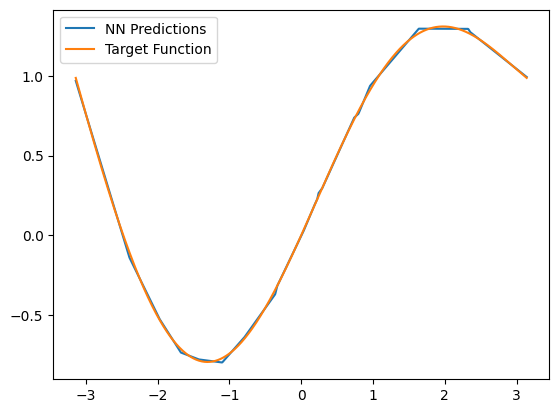

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def target_function(x):
    return np.sin(x) + 0.1 * x**2

# 定义ReLU激活函数及其导数
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# 初始化网络参数
np.random.seed(42) # 保证结果可重现
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 200000

# 随机初始化权重和偏置
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, hidden_size)
b2 = np.zeros(hidden_size)
W3 = np.random.randn(hidden_size, output_size)
b3 = np.zeros(output_size)

# 生成训练数据
x_train = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)
y_train = target_function(x_train)

# 训练神经网络
for epoch in range(epochs):
    # 前向传播
    z1 = x_train.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2 
    a2 = relu(z2)
    z3 = a2.dot(W3) + b3   

    predictions = z3
    
    # 计算损失
    loss = np.mean((predictions - y_train) ** 2)
    
    # 反向传播
    dloss_dpredictions = 2.0 * (predictions - y_train) / y_train.size
    dloss_dW3 = a1.T.dot(dloss_dpredictions)
    dloss_db3 = np.sum(dloss_dpredictions, axis=0)

    dloss_da2 = dloss_dpredictions.dot(W3.T)
    dloss_dz2 = dloss_da2 * relu_derivative(z2)
    dloss_dW2 = a1.T.dot(dloss_dz2)
    dloss_db2 = np.sum(dloss_dz2, axis=0)
    
    dloss_da1 = dloss_da2.dot(W2.T)
    dloss_dz1 = dloss_da1 * relu_derivative(z1)
    dloss_dW1 = x_train.T.dot(dloss_dz1)
    dloss_db1 = np.sum(dloss_dz1, axis=0)  
    # 更新权重和偏置
    W1 -= learning_rate * dloss_dW1
    b1 -= learning_rate * dloss_db1
    W2 -= learning_rate * dloss_dW2
    b2 -= learning_rate * dloss_db2
    W3 -= learning_rate * dloss_dW3
    b3 -= learning_rate * dloss_db3
    
    if epoch % (epochs // 10) == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# 测试神经网络
x_test = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1)
z1 = x_test.dot(W1) + b1
a1 = relu(z1)
z2 = a1.dot(W2) + b2
a2 = relu(z2)
z3 = a2.dot(W3) + b3
predictions = z3

# 绘制结果
plt.plot(x_test, predictions, label='NN Predictions')
plt.plot(x_test, target_function(x_test), label='Target Function')
plt.legend()
plt.show()


## pytorch

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 设置目标函数
def target_function(x):
    return np.sin(x) + 0.1 * x**2

# 生成数据
x_train = np.linspace(-10, 10, 1000).astype(np.float32)
y_train = target_function(x_train)
x_train_tensor = torch.tensor(x_train).view(-1, 1)
y_train_tensor = torch.tensor(y_train).view(-1, 1)


class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out




Epoch [100/1000], Loss: 0.2882
Epoch [200/1000], Loss: 0.2287
Epoch [300/1000], Loss: 0.2231
Epoch [400/1000], Loss: 0.2142
Epoch [500/1000], Loss: 0.1868
Epoch [600/1000], Loss: 0.1118
Epoch [700/1000], Loss: 0.0258
Epoch [800/1000], Loss: 0.0080
Epoch [900/1000], Loss: 0.0086
Epoch [1000/1000], Loss: 0.0039


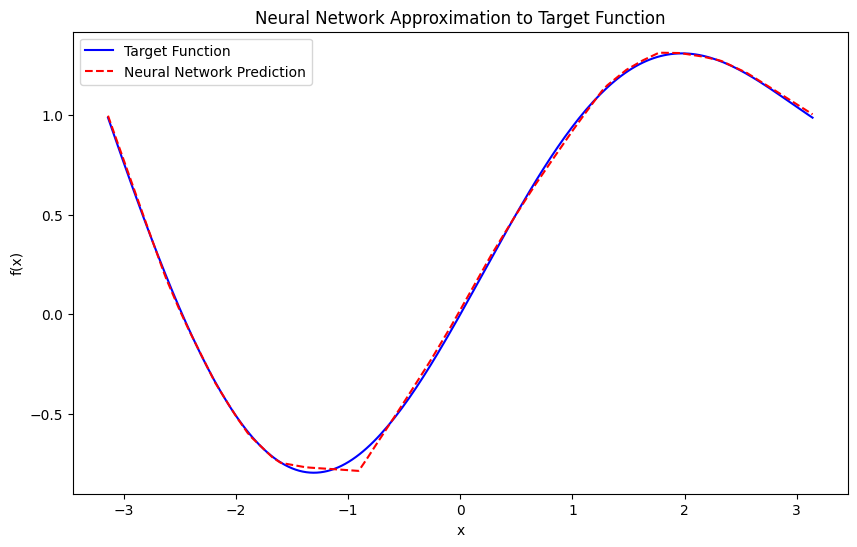

In [22]:

model = TwoLayerNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
epochs = 1000
for epoch in range(epochs):
    # 正向传递
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Predict
x_test_tensor = torch.tensor(np.linspace(-np.pi, np.pi, 1000).astype(np.float32)).view(-1, 1)
y_pred_tensor = model(x_test_tensor)
y_pred = y_pred_tensor.detach().numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, label='Target Function', color='blue')
plt.plot(x_test_tensor.numpy(), y_pred, label='Neural Network Prediction', color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Neural Network Approximation to Target Function')
plt.show()